# Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

The data is in /usr/info/courses/COMP13212/census11sample.csv. Read it in to a dataframe.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
df = pd.read_csv("census11sample.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(20)

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


## Divide the data (2 marks)

You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hypothesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

In [153]:
half_df = len(df) // 2
sample_explore = df[['North West','South West']]
sample_explore = sample_explore.iloc[:half_df,]
sample_test = df[['North West','South West']]
sample_test = sample_test.iloc[half_df:len(df)]
sample_explore.head(505)

,North West,South West
0,32,9
1,36,40
2,53,57
3,63,74
4,98,19
...,...,...
495,37,48
496,39,68
497,26,19
498,68,8


In [154]:
sample_test.head(505)

,North West,South West
500,77,58
501,19,60
502,14,53
503,50,80
504,66,3
...,...,...
995,59,21
996,45,74
997,5,34
998,69,94


## Explore the data (5 marks)

Explore dataset sample_explore. Measure descriptive statistics, plot histograms, scatterplots, and whatever. Find something interesting in the data, and generate a hypothesis about it. Remember, a hypothesis is a statement which is true or false, and can be falsefied.  

In [155]:
data = sample_explore.describe()
data

,North West,South West
count,500.000000,500.00000
mean,39.530000,43.42800
std,23.727095,24.03948
min,0.000000,0.00000
25%,19.000000,23.00000
50%,40.000000,44.00000
75%,57.000000,61.00000
max,98.000000,98.00000


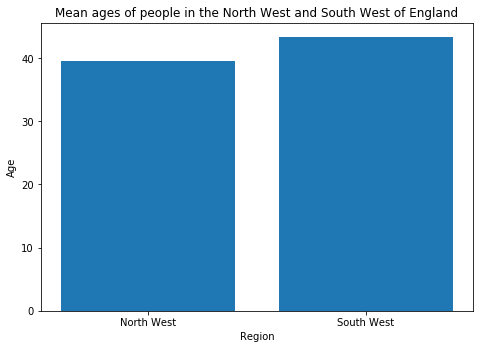

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
regions = ['North West', 'South West']
meanAge = [(data.iloc[1,0]),(data.iloc[1,1])]
ax.bar(sample_explore.columns, [float(x) for x in meanAge])
plt.xlabel("Region")
plt.ylabel("Age")
plt.title("Mean ages of people in the North West and South West of England")
plt.show()

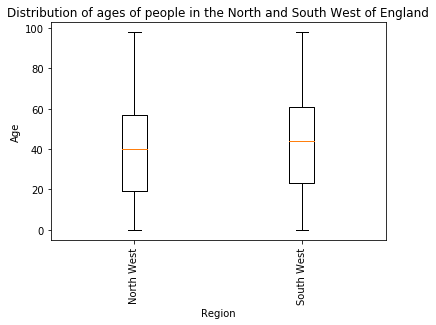

In [157]:
i = 0
areas = []
while i < 2:
    areas.append(sample_explore[data.columns[i]])
    i += 1
plt.boxplot(areas, labels=sample_explore.columns)
plt.xticks(rotation= "vertical")
plt.xlabel("Region")
plt.ylabel("Age")
plt.title("Distribution of ages of people in the North and South West of England")
plt.show()

## State your hypothesis, and state the evidence that justifies it. (2 marks)

The hypothesis is that the age of people in the North West is lower compared to the age of people in the South West. The evidence that supports this is the difference in their mean ages which is 39.530 for the North West compared to 43.428 for the South West. This evidence is further supported by the age being higher in the South West at each quartile when in comparison with the North West from the test data. 

## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

The test will be carried out using a t-test at a 5% significance level. The null hypothesis is there is no difference in the average age of people between the North West and South West of England. The alternate hypothesis that the average age of people is lower in the North West of England compared to the South West.

## Perform the statistical test of the hypothesis. (5 marks)

You may do this using classical statistical methods, Bayesian methods, or, if you are uncomfortable with the notion that the data is normally distributed, you can use Monte Carlo (bootstrap) sampling. 

In [158]:
testData = sample_test.describe()
testData
#print(testData.iloc[2,1])

,North West,South West
count,500.000000,500.000000
mean,38.628000,43.244000
std,22.886091,24.779842
min,0.000000,0.000000
25%,19.000000,21.000000
50%,39.000000,44.000000
75%,56.000000,62.000000
max,99.000000,95.000000


The T- value is:  -4.510027410819781 and this is further than the critical score of  -1.6479129840597067 .


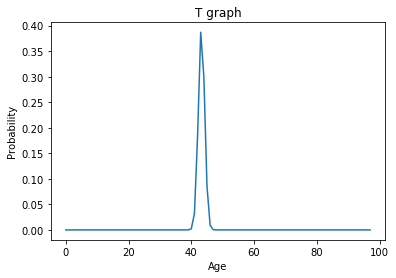

In [159]:
alpha = 0.05
n = 500
sd = (testData.iloc[2,1])
mean = (testData.iloc[1,1])
testMean = (testData.iloc[1,0])
testSD = (testData.iloc[2,0])
d = testSD / math.sqrt(n)
t = (testMean - mean) / d
x=np.arange(0,98,1)
graph= stats.t.pdf(x,499,mean)
upper = stats.t.ppf(0.95,499)
lower = stats.t.ppf(0.05,499)
plt.plot(x,graph)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("T graph")
#print(lower)
#print(upper)
#print(mean)
print("The T- value is: ",t, "and this is further than the critical score of ",lower,".")

## Conclusions. (2 Marks) 

Write out your conclusion completely, but in a single sentence. E.g. "Using the method of XXX, I find that the null hypothesis is/cannot be ruled out at Y percent level." 

Using the method of the Student's t-test, I find that the null hypothesis can be ruled out at the 5% significance level.

## What to submit.

You will submit a Jupyter Notebook/Lab to GitLab. The notebook needs to have the same headings as this document, but only up to the conclusions section. I.e. every section with a mark associated with it. Fill in each section with the appropriate text, code, measurements and graphics to perform the required tasks. You can start with this document, and fill it in. 

 ***

## Useful tools and commands.

### Z-test and t-test
For a z-test, you will need properties from the normal distribution. For a t-test, you will need properties of the Student-t distribution. There are many to get these in python. One way is to use `scipy.stats`. You can `from scipy import stats` which gives you all of stats, or just import the normal distribution, which is called norm - `from scipy.stats import norm`, or import the t-distribution, `from scipy.stats import t`. 

In [160]:
from scipy import stats

For all distributions in `scipy.stats`, the method `.pdf` gives the probability distribution, `.cdf` gives the cumulative distribution, `.ppf` gives an inverse of the cdf (very useful), and `.interval` gives a confidence interval. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm.

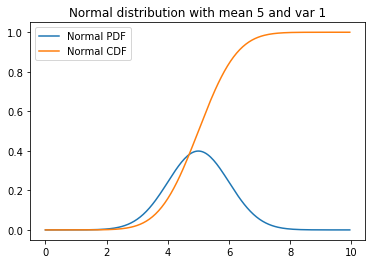

In [161]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,10,0.05)
y=stats.norm.pdf(x,5,1) # PDF of a normal distribution with mean 5 and variance 1
z=stats.norm.cdf(x,5,1) # CDF of a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal PDF')
plt.plot(x,z,label='Normal CDF')
plt.legend()
plt.title('Normal distribution with mean 5 and var 1')
plt.show()

### Two-tailed test

The confidence interval is a function of $\alpha$ and is the smallest interval which contains $1-\alpha$ of the probability. For a two-tailed test, if the test statistic is outside the confidence interval, the null hypothesis is rejected; if it is inside the confidence interval, the null hypothesis is not rejected. All distributions in `scipy.stats` have a method `interval` which computes confidence interval.

The 95% confidence interval lies between 3.04 and 6.96.


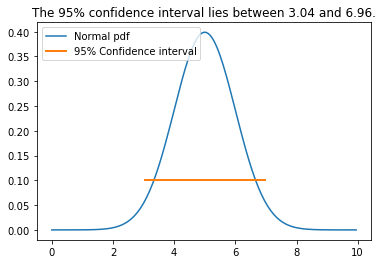

In [162]:
alpha = 0.05
x=np.arange(0,10,0.05)
y=stats.norm.pdf(x,5,1) # a normal distribution with mean 5 and variance 1
plt.plot(x,y,label='Normal pdf')
ci=stats.norm.interval(1-alpha,5,1)
print("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.plot([ci[0],ci[1]],[0.1,0.1],linewidth=2.0,label="95% Confidence interval")
plt.legend(loc=2)
plt.title("The 95%% confidence interval lies between %3.2f and %3.2f." %(ci[0],ci[1]))
plt.show()

### One tail test
Here is where `ppf` (the inverse of the cumulative distribution) is very useful. The lower tail critical value is where the cumulative distribution is equal to $\alpha$. The upper tail critical value is where the cumulative distribution is equal to $1-\alpha$. For a symmetric distribution (such as the normal or t distributions) the two critical values will be the same, but in general they will be different.

#### Lower tail and upper tail of a normal distribution with mean 5 and variance 1

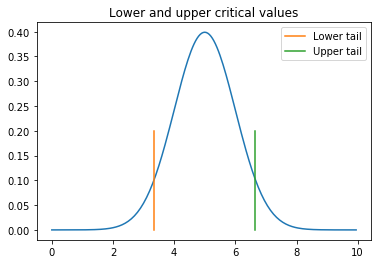

In [163]:
alpha = 0.05
lower = stats.norm.ppf(alpha,5,1)
upper = stats.norm.ppf(1-alpha,5,1)
plt.plot(x,y)
plt.plot([lower,lower],[0,0.2],label="Lower tail")
plt.plot([upper,upper],[0,0.2],label="Upper tail")
plt.legend()
plt.title("Lower and upper critical values")
plt.show()

The t-distribution works in a similar way, except the so-called "shape parameter" is the number of degrees of freedom, rather than the variance, and the location parameter (the mean) comes after the degrees of freedom.

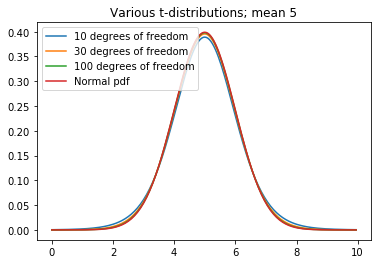

In [164]:
y10=stats.t.pdf(x,10,5)
y30=stats.t.pdf(x,30,5)
y100=stats.t.pdf(x,100,5)
plt.plot(x,y10,label="10 degrees of freedom")
plt.plot(x,y30,label="30 degrees of freedom")
plt.plot(x,y100,label="100 degrees of freedom")
plt.plot(x,y,label='Normal pdf')
plt.legend(loc=2)
plt.title("Various t-distributions; mean 5")
plt.show()

Notice how similar the t-distribution is to the normal distribution, even with the number of degrees of freedom as low as 10.

## Monte Carlo/Bootstrap sampling
If you want to do the statistics by generating samples from the data, you can use the method, `numpy.random.choice`. The first argument is the orginal data; the second argument is the size of the sample. The third argument is a boolean, determining with the sampling is with replacement or without replacement. By default, it does sampling with replacement, which is what you will need. 

In [165]:
a=[1,2,3,4,5]
b=np.random.choice(a,4)
c=np.random.choice(a,4,replace=False) # sample without replacement. replace=True by default.
print(b)
print(c)

[2 4 5 2]
[3 5 4 1]


# The end!